## Two neuron example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


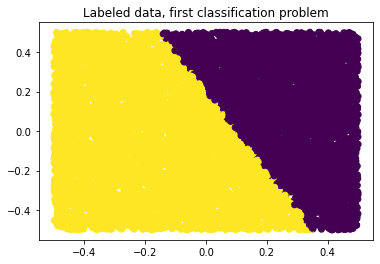

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classification problem')
plt.show()
# Yes because the boundary is a linear boundary. In this case we have an offset of 0.2 so we need of the bias to 
# correctly classify the data points

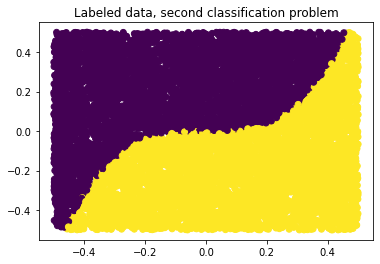

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classification problem')
plt.show()
# No bacause the decision bourdary is not linear. In this case, we don't have an offset

#### c)

In [4]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 1 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat = logsig(Xb[[i],:]@W) 
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Wnew = W - alpha*Xb[[i],:].T@delta
        W = Wnew
    print('epoch: ', epoch)

epoch:  0


In [5]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

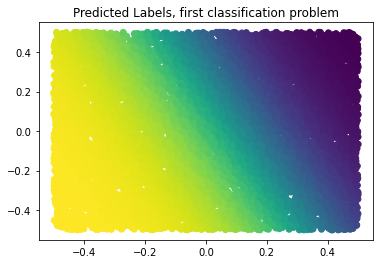

In [6]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classification problem')
plt.show()

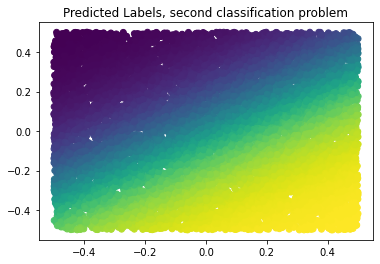

In [7]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classification problem')
plt.show()

In [8]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('First classification problem:\nErrors:', err_c1)
print()
err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Second classification problem:\nErrors:', err_c2)

First classification problem:
Errors: 163.0

Second classification problem:
Errors: 785.0


#### d)

In [10]:
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes
L = 20
W = np.random.randn(p+1, q)

errors_1 = []
errors_2 = []
        
for j in range(5):
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate 
            Yhat = logsig(Xb[[i],:]@W) 
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Wnew = W - alpha*Xb[[i],:].T@delta
            W = Wnew
    Yhat = logsig(Xb@W)
    errors_1.append(np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    errors_2.append(np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
print('epochs: ', L)
print("First Classification avg of errors:", sum(errors_1)/5)
print("Second Classification avg of errors:", sum(errors_2)/5)

epochs:  20
First Classification avg of errors: 20.2
Second Classification avg of errors: 775.0


#### e)
With 20 epochs the average amount of errors decreaases compared to using just one epoch 